<a href="https://colab.research.google.com/github/ehadsaloF/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#importing data
df = pd.read_excel("/content/Unit6-Portfolio-Task-Data.xlsx", header=1)

In [ ]:
# df.columns=df.iloc[0]
df.head()

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
0,0,739,13,12,M,Single,23,Own,Unskilled,Low
1,0,1230,25,0,M,Divorced,32,Own,Skilled,High
2,0,389,19,119,M,Single,38,Own,Management,High
3,638,347,13,14,M,Single,36,Own,Unskilled,High
4,963,4754,40,45,M,Single,31,Rent,Skilled,Low


##Data Cleaning

In [ ]:
# check for datatype of features
df.dtypes

Current Account     int64
Savings Account     int64
Months Customer     int64
Months Employed     int64
Gender             object
Marital Status     object
Age                 int64
Housing            object
Job                object
Credit Risk        object
dtype: object

In [ ]:
#check for null vaues
df.isnull().sum()

Current Account    0
Savings Account    0
Months Customer    0
Months Employed    0
Gender             0
Marital Status     0
Age                0
Housing            0
Job                0
Credit Risk        0
dtype: int64

In [ ]:
#Checking for wrongly spelt values
for i in ['Gender', 'Marital Status', 'Housing', 'Job', 'Credit Risk']:
  print(df[i].value_counts())
  print('\n')

M    290
F    135
Name: Gender, dtype: int64


Single      233
Divorced    156
Married      36
Name: Marital Status, dtype: int64


Own      292
Rent      81
Other     52
Name: Housing, dtype: int64


Skilled       271
Unskilled      89
Management     54
Unemployed     11
Name: Job, dtype: int64


Low     214
High    211
Name: Credit Risk, dtype: int64




## Descriptive Statistics

In [68]:
#descriptive statistics
df.describe(include='all')

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
count,425.000000,425.000000,425.000000,425.000000,425,425,425.000000,425,425,425
unique,NaN,NaN,NaN,NaN,2,3,NaN,3,4,2
top,NaN,NaN,NaN,NaN,M,Single,NaN,Own,Skilled,Low
freq,NaN,NaN,NaN,NaN,290,233,NaN,292,271,214
mean,1048.014118,1812.562353,22.896471,31.896471,NaN,NaN,34.397647,NaN,NaN,NaN
std,3147.183472,3597.285020,12.267599,32.259321,NaN,NaN,11.045126,NaN,NaN,NaN
min,0.000000,0.000000,5.000000,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN
25%,0.000000,228.000000,13.000000,6.000000,NaN,NaN,26.000000,NaN,NaN,NaN
50%,0.000000,596.000000,19.000000,20.000000,NaN,NaN,32.000000,NaN,NaN,NaN
75%,560.000000,921.000000,28.000000,47.000000,NaN,NaN,41.000000,NaN,NaN,NaN


The value of the median of the current account balance and savings account balance is very far from the mean. This means they are skewed.

## Data Visualization

###  Current Account


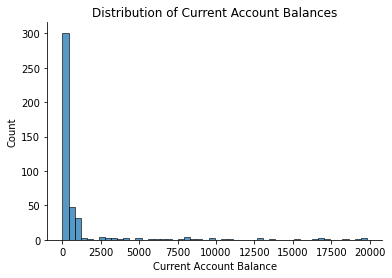

In [ ]:
# Create a histogram of current account balances
sns.histplot(data=df, x='Current Account', bins=50)
plt.title('Distribution of Current Account Balances')
plt.xlabel('Current Account Balance')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

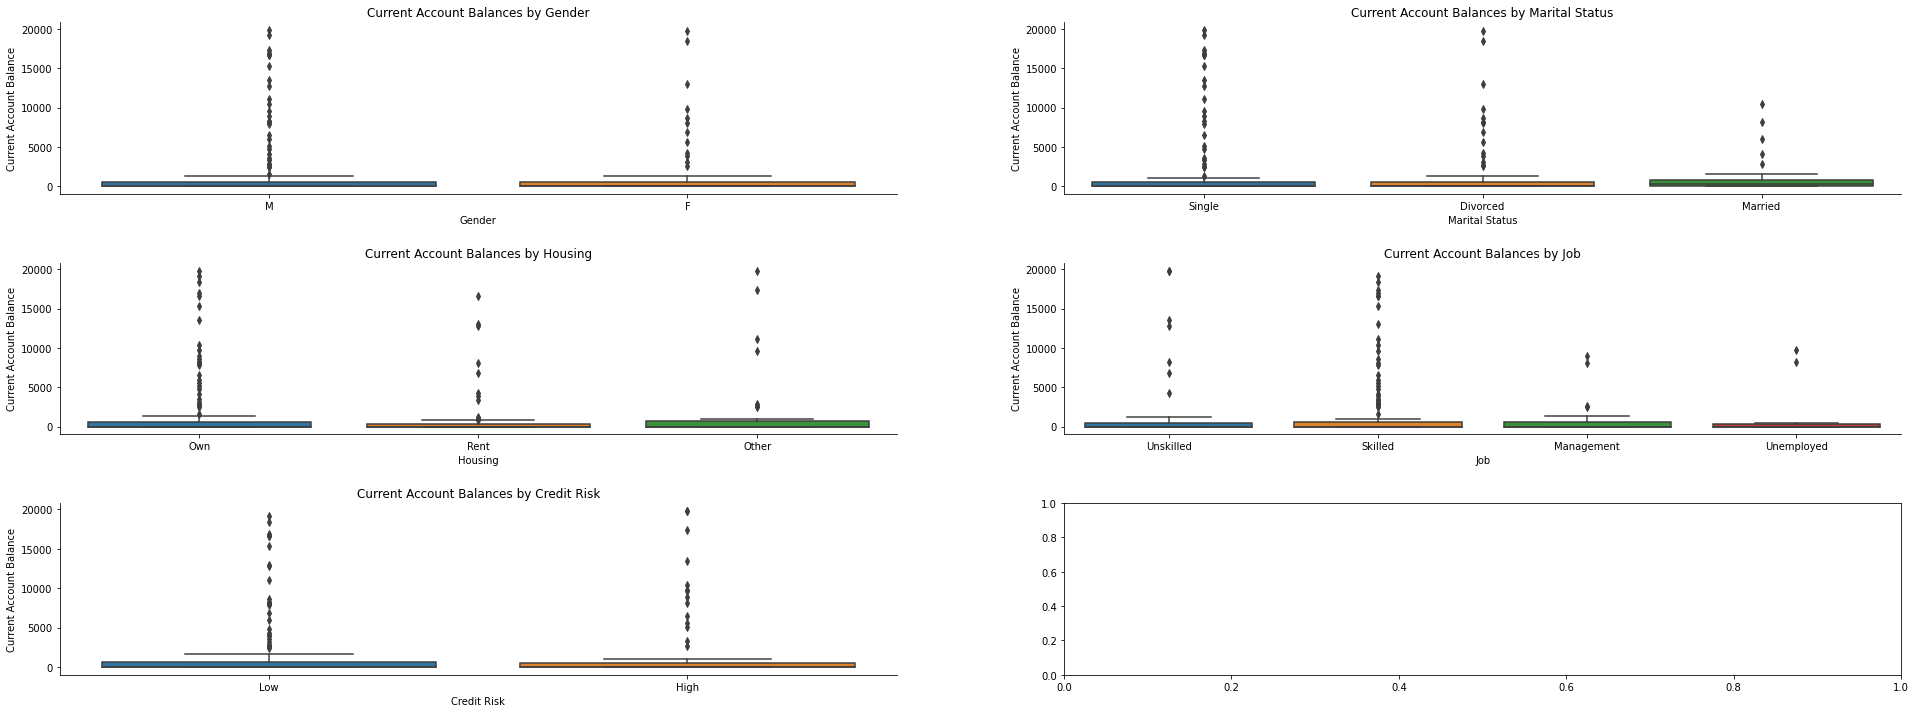

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of current account balances by gender
sns.boxplot(data=df, x='Gender', y='Current Account', ax=axes[0,0])
axes[0,0].set_title('Current Account Balances by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Current Account Balance')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of current account balances by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Current Account', ax=axes[0,1])
axes[0,1].set_title('Current Account Balances by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Current Account Balance')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of current account balances by Housing
sns.boxplot(data=df, x='Housing', y='Current Account', ax=axes[1,0])
axes[1,0].set_title('Current Account Balances by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Current Account Balance')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of current account balances by Job
sns.boxplot(data=df, x='Job', y='Current Account', ax=axes[1,1])
axes[1,1].set_title('Current Account Balances by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Current Account Balance')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of current account balances by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Current Account', ax=axes[2,0])
axes[2,0].set_title('Current Account Balances by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Current Account Balance')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()


###  Savings Account


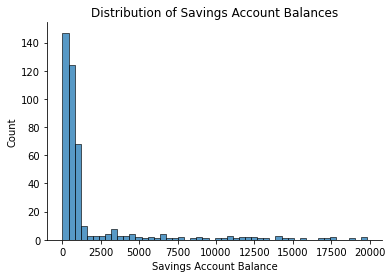

In [ ]:
# Create a histogram of savings account balances
sns.histplot(data=df, x='Savings Account', bins=50)
plt.title('Distribution of Savings Account Balances')
plt.xlabel('Savings Account Balance')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

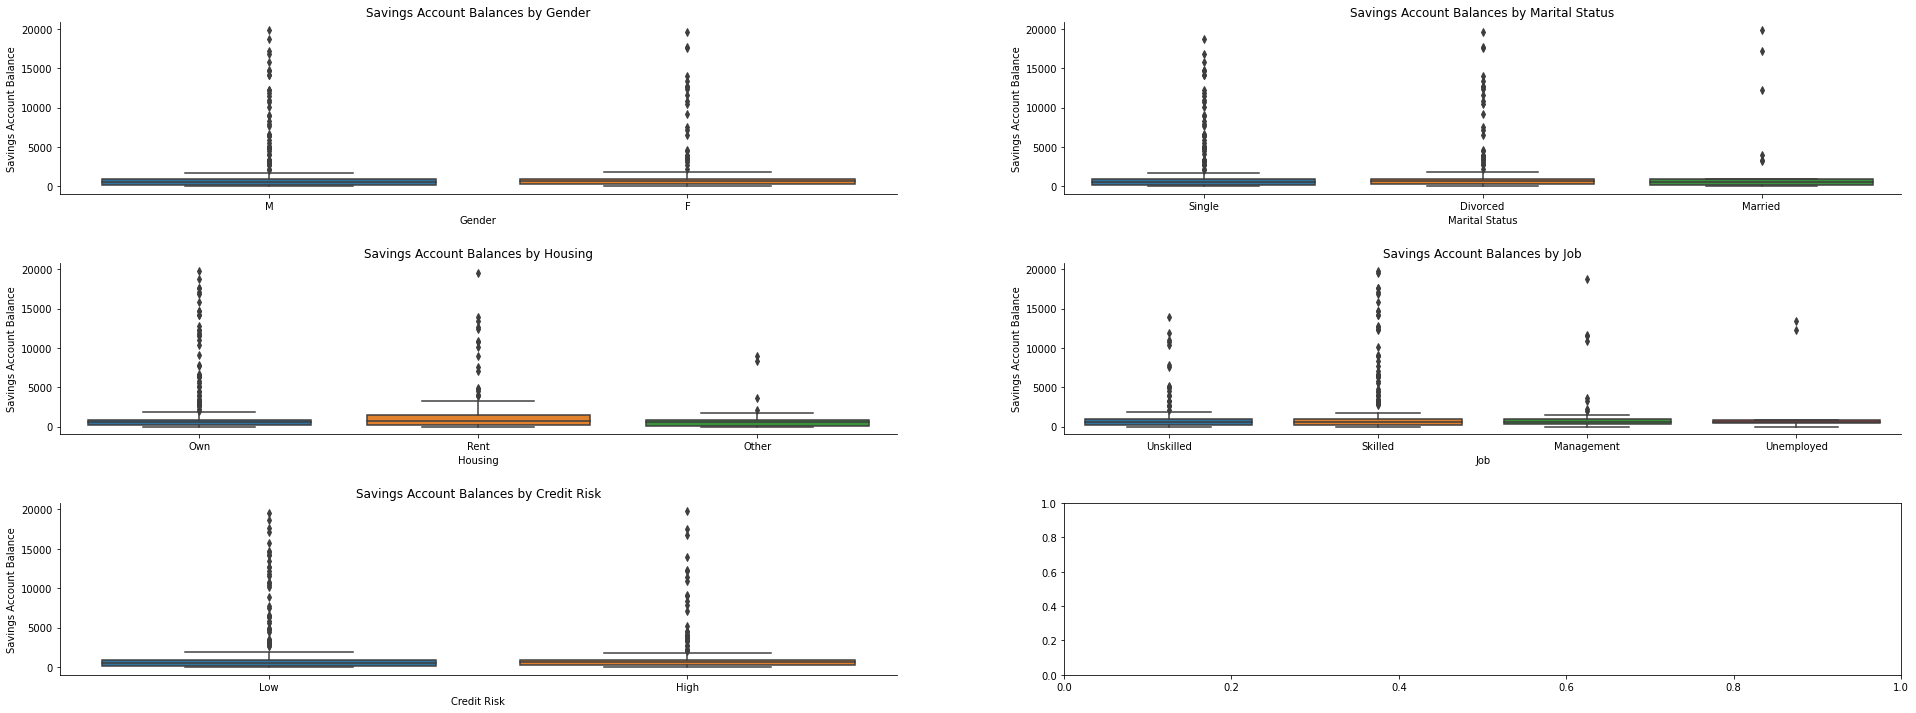

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Savings account balances by gender
sns.boxplot(data=df, x='Gender', y='Savings Account', ax=axes[0,0])
axes[0,0].set_title('Savings Account Balances by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Savings Account Balance')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Savings Account', ax=axes[0,1])
axes[0,1].set_title('Savings Account Balances by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Savings Account Balance')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Housing
sns.boxplot(data=df, x='Housing', y='Savings Account', ax=axes[1,0])
axes[1,0].set_title('Savings Account Balances by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Savings Account Balance')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Job
sns.boxplot(data=df, x='Job', y='Savings Account', ax=axes[1,1])
axes[1,1].set_title('Savings Account Balances by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Savings Account Balance')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Savings Account', ax=axes[2,0])
axes[2,0].set_title('Savings Account Balances by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Savings Account Balance')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Months Customer


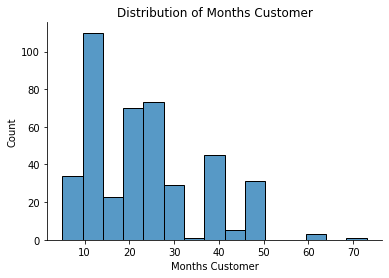

In [ ]:
# Create a histogram of Months Customer balances
sns.histplot(data=df, x='Months Customer', bins=15)
plt.title('Distribution of Months Customer')
plt.xlabel('Months Customer')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

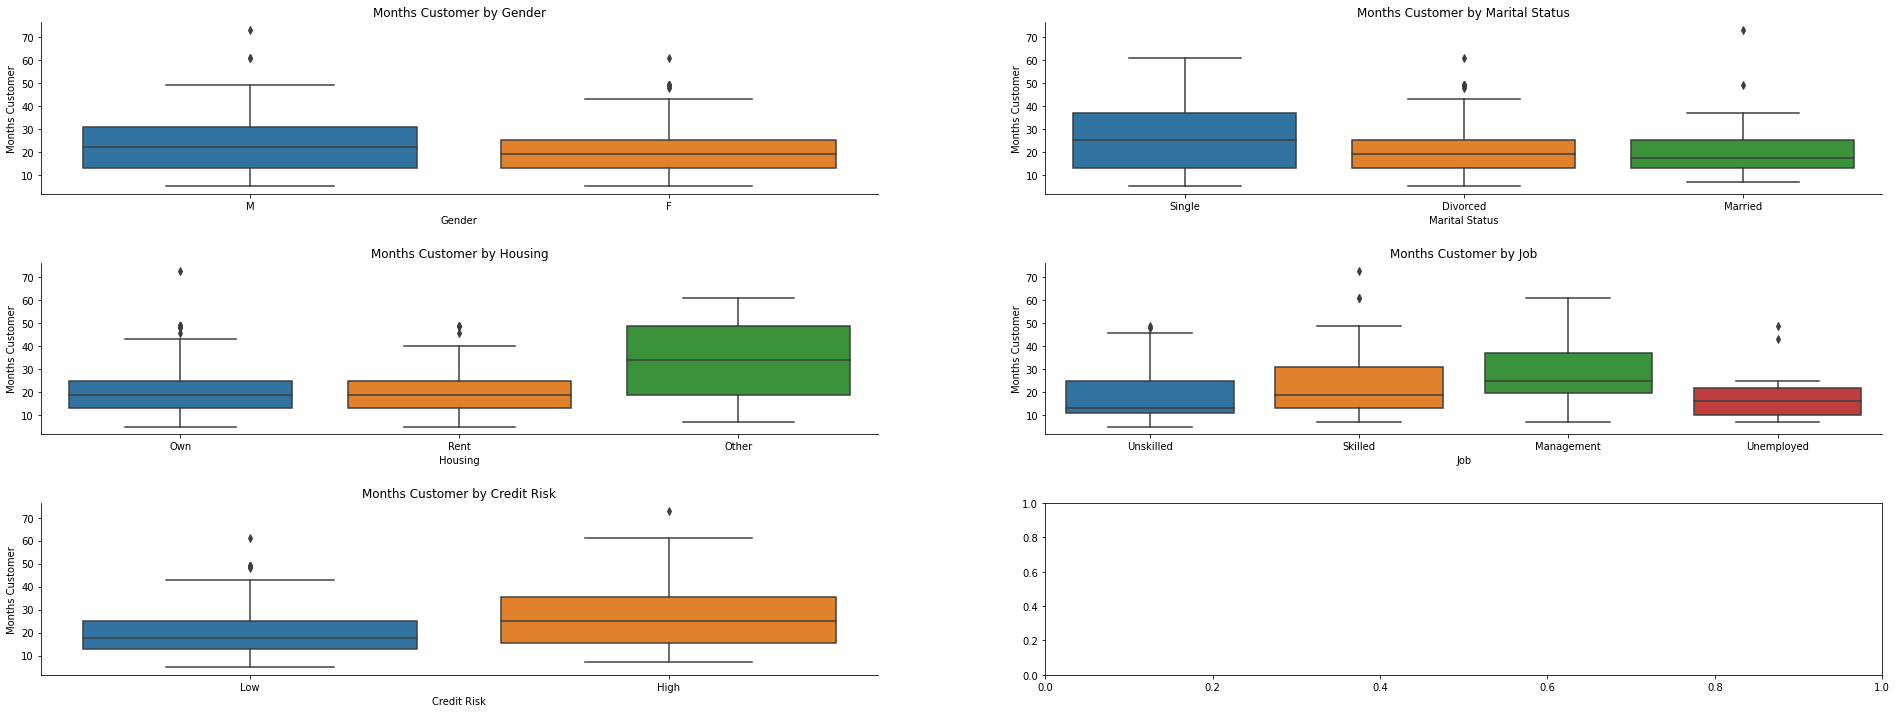

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Months Customer by gender
sns.boxplot(data=df, x='Gender', y='Months Customer', ax=axes[0,0])
axes[0,0].set_title('Months Customer by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Months Customer')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Months Customer by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Months Customer', ax=axes[0,1])
axes[0,1].set_title('Months Customer by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Months Customer')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of Months Customer by Housing
sns.boxplot(data=df, x='Housing', y='Months Customer', ax=axes[1,0])
axes[1,0].set_title('Months Customer by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Months Customer')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Job
sns.boxplot(data=df, x='Job', y='Months Customer', ax=axes[1,1])
axes[1,1].set_title('Months Customer by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Months Customer')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of Months Customer by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Months Customer', ax=axes[2,0])
axes[2,0].set_title('Months Customer by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Months Customer')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Months Employed


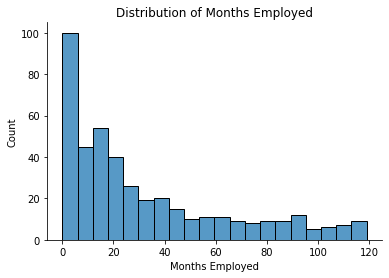

In [ ]:
# Create a histogram of Months Employed balances
sns.histplot(data=df, x='Months Employed', bins=20)
plt.title('Distribution of Months Employed')
plt.xlabel('Months Employed')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

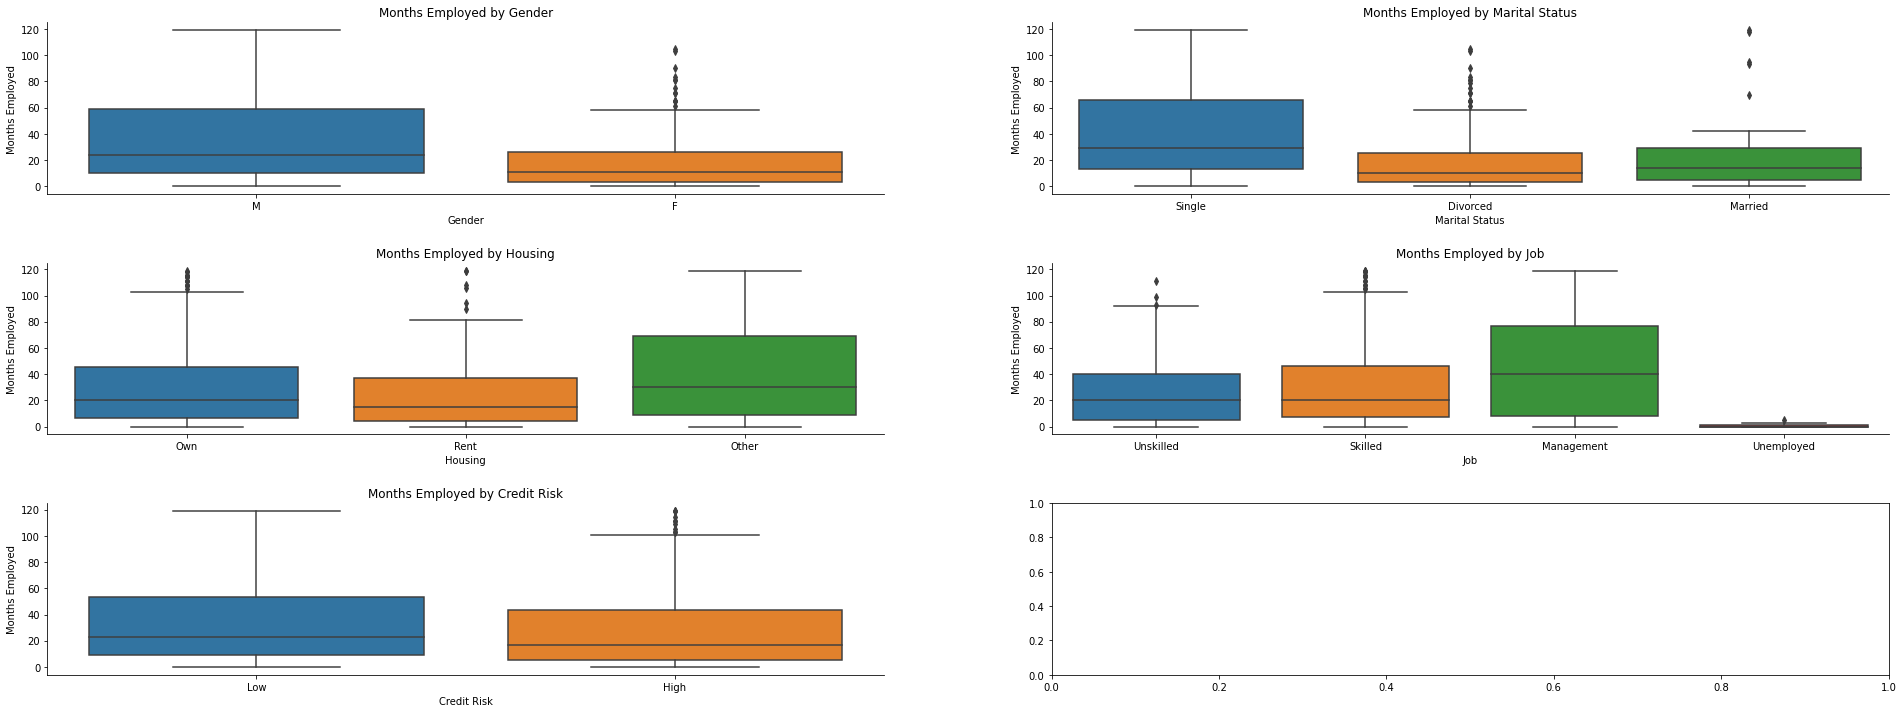

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Months Employed by gender
sns.boxplot(data=df, x='Gender', y='Months Employed', ax=axes[0,0])
axes[0,0].set_title('Months Employed by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Months Employed')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Months Employed by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Months Employed', ax=axes[0,1])
axes[0,1].set_title('Months Employed by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Months Employed')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of Months Employed by Housing
sns.boxplot(data=df, x='Housing', y='Months Employed', ax=axes[1,0])
axes[1,0].set_title('Months Employed by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Months Employed')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Job
sns.boxplot(data=df, x='Job', y='Months Employed', ax=axes[1,1])
axes[1,1].set_title('Months Employed by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Months Employed')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of Months Employed by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Months Employed', ax=axes[2,0])
axes[2,0].set_title('Months Employed by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Months Employed')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Gender


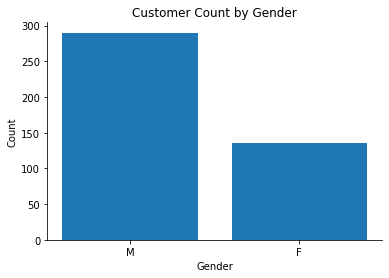

In [60]:
# Count the number of customers by gender
gender_counts = df['Gender'].value_counts()

# Create a bar chart
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer Count by Gender')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Marital Status


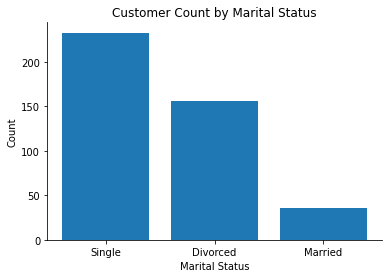

In [61]:
# Count the number of customers by gender
Marital_counts = df['Marital Status'].value_counts()

# Create a bar chart
plt.bar(Marital_counts.index, Marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Customer Count by Marital Status')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Age


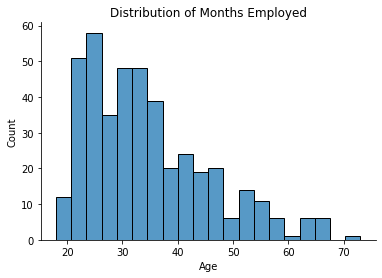

In [62]:
# Create a histogram of Age
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

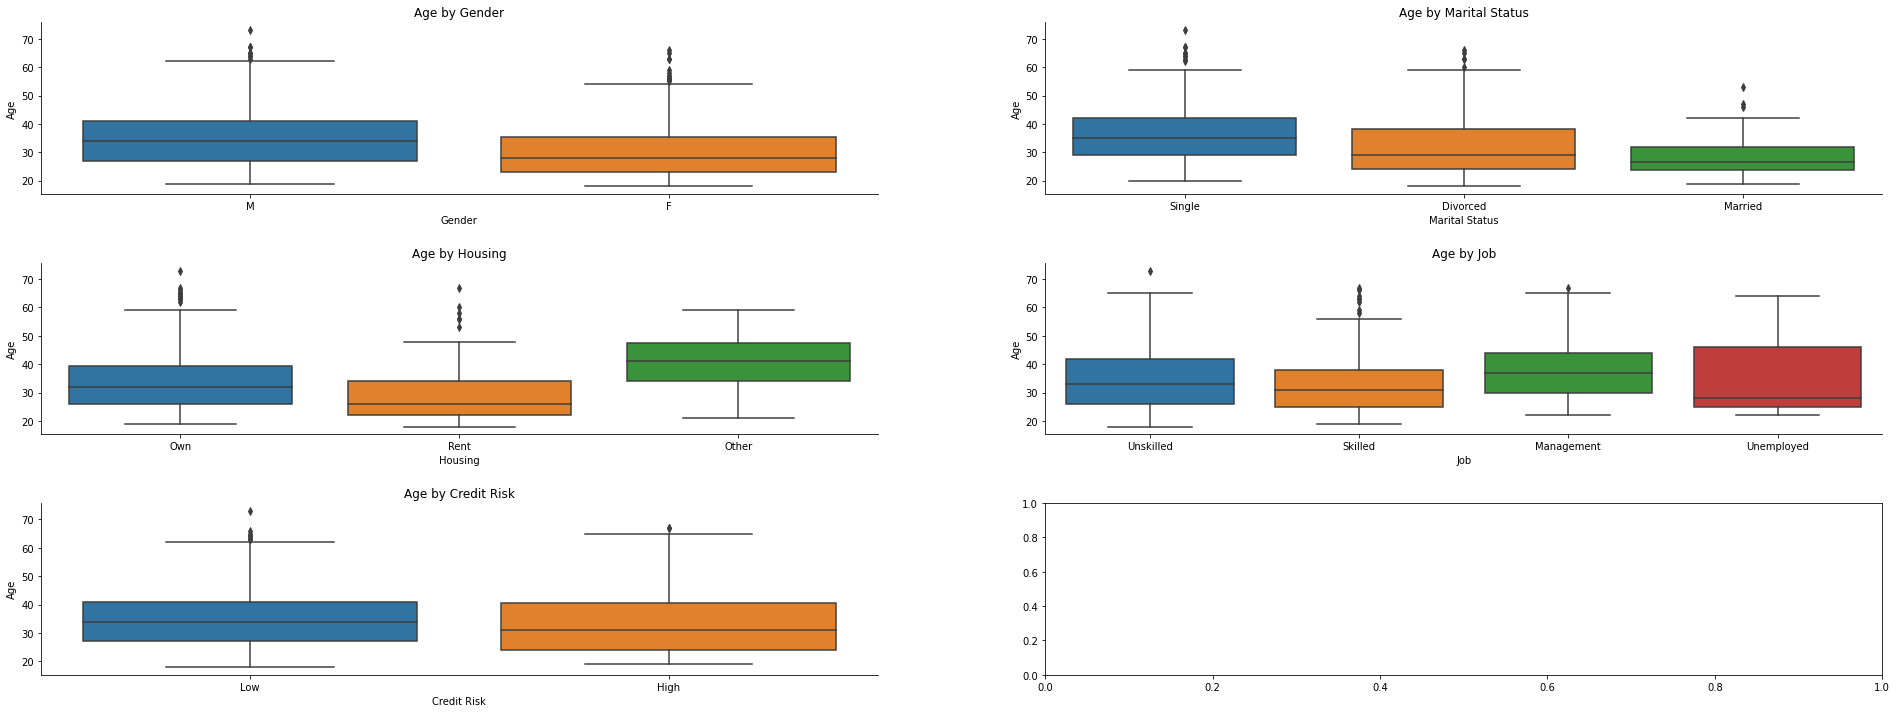

In [63]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Age by gender
sns.boxplot(data=df, x='Gender', y='Age', ax=axes[0,0])
axes[0,0].set_title('Age by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Age')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Age by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Age', ax=axes[0,1])
axes[0,1].set_title('Age by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Age')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot ofAgeby Housing
sns.boxplot(data=df, x='Housing', y='Age', ax=axes[1,0])
axes[1,0].set_title('Age by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Age')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Age by Job
sns.boxplot(data=df, x='Job', y='Age', ax=axes[1,1])
axes[1,1].set_title('Age by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Age')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot ofAge by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Age', ax=axes[2,0])
axes[2,0].set_title('Age by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Age')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Housing


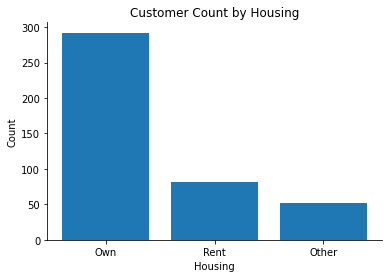

In [64]:
# Count the number of customers by Housing
Housing_counts = df['Housing'].value_counts()

# Create a bar chart
plt.bar(Housing_counts.index, Housing_counts.values)
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Customer Count by Housing')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Job


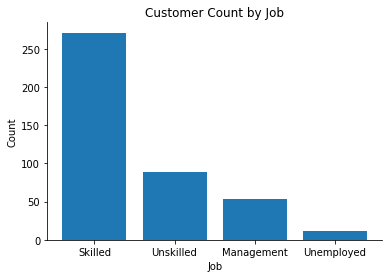

In [65]:
# Count the number of customers by Job
Job_counts = df['Job'].value_counts()

# Create a bar chart
plt.bar(Job_counts.index, Job_counts.values)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Customer Count by Job')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Credit Risk


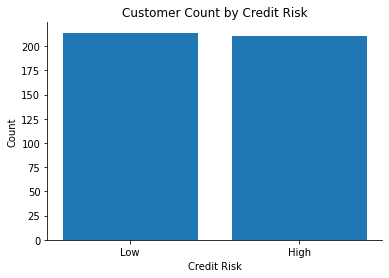

In [67]:
# Count the number of customers by Credit Risk
Risk_counts = df['Credit Risk'].value_counts()

# Create a bar chart
plt.bar( Risk_counts.index, Risk_counts.values)
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Customer Count by Credit Risk')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

The visualizations show that the current account balance and savings account balance are heavily right skewed, they will need to be transformed before clustering the customers.

## Clustering

Hierarchical clustering was used to segment the customer data. 
<p> 
Agglomerative clustering method was used, where every object starts in its own cluster and via an iterative process, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named the <b>Dendrogram</b>. 
</p> 

<p>
In the dendrogram, the longest horizontal lines represent the largest differences. The desired number of clusters can be obtained by cutting the dendrogram at the proper level. 
</p> 

<p>
Hierarchical clustering analysis was carried out, the variables used are the continuous variables in the customer’s data, which are the customer’s age, savings and current account balance, how long they have been customers with the bank and how long they have been in employment. In this report, we use the Euclidean distance as the distance measure.
</p> 

In this report we compare two agglomerative hierarchical clustering methods, <b>Complete-link Clustering</b> and <b>Wards Clustering</b>. 

### Complete Link Clustering 

It is also known as furthest neighbour; this model considers the furthest distance between pairs of objects. <p>An object joins a cluster only if is like all cluster members.

In [83]:
# Apply a logarithmic transformation to the current account balances
df['log_current_account'] = np.log(df['Current Account'] + 1)

df['log_savings_account'] = np.log(df['Savings Account'] + 1)




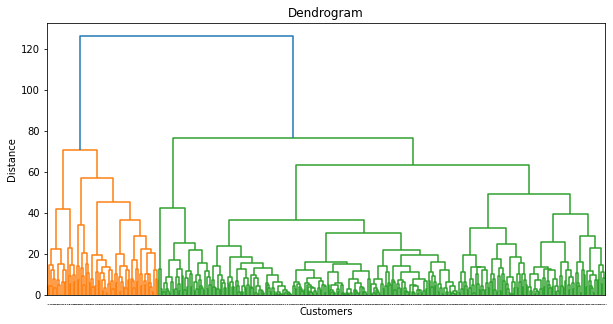

In [84]:
# define the variables to be used in clustering
X = df[['log_current_account', 'log_savings_account', 'Months Customer', 'Months Employed']]

# perform complete-linkage clustering
Z = linkage(X, method='complete', metric='euclidean')


# Plot a dendrogram to help choose the number of clusters
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=180, leaf_font_size=2.)
plt.show()

In [112]:
# Cut the dendrogram to obtain the desired number of clusters
# Cut the dendrogram to obtain the desired number of clusters
threshold = 75
clusters = fcluster(Z, t=threshold, criterion='distance')

# n_clusters = 3
# clusters = pd.Series(
#     pd.cut(
#         np.arange(X.shape[0]), 
#         n_clusters, 
#         labels=False
#     )
# )

# # Add the cluster labels to the original DataFrame
df['cluster'] = clusters


In [113]:
# for col in set(data.columns) - set(continuous_cols):
#             categorical_stats[col] = dict(cluster_data[col].value_counts(normalize=True))

for i in ['Gender', 'Marital Status', 'Housing',	'Job',	'Credit Risk']:
  print(df.groupby('cluster')[i].value_counts(normalize=True))
   

cluster  Gender
1        M         0.847059
         F         0.152941
2        M         0.750000
         F         0.250000
3        M         0.626667
         F         0.373333
Name: Gender, dtype: float64
cluster  Marital Status
1        Single            0.776471
         Divorced          0.164706
         Married           0.058824
2        Single            0.550000
         Divorced          0.375000
         Married           0.075000
3        Single            0.483333
         Divorced          0.423333
         Married           0.093333
Name: Marital Status, dtype: float64
cluster  Housing
1        Own        0.670588
         Other      0.188235
         Rent       0.141176
2        Own        0.550000
         Other      0.275000
         Rent       0.175000
3        Own        0.710000
         Rent       0.206667
         Other      0.083333
Name: Housing, dtype: float64
cluster  Job       
1        Skilled       0.623529
         Management    0.235294
         U

In [114]:
# Compute the descriptive statistics for each cluster
stats = df.groupby('cluster').agg(['count','mean', 'std', 'min', 'max', 'median'])

# Print the descriptive statistics for each variable in each cluster
for var in ['Current Account', 'Savings Account', 'Months Customer', 'Months Employed', 'Age']:
    print(f"\nDescriptive statistics for {var}")
    print(stats[var])


Descriptive statistics for Current Account
         count         mean          std  min    max  median
cluster                                                     
1           85   869.447059  2715.163638    0  16935     0.0
2           40   893.150000  2096.452933    0  11072   206.5
3          300  1119.256667  3373.990888    0  19812     0.0

Descriptive statistics for Savings Account
         count         mean          std  min    max  median
cluster                                                     
1           85  2155.211765  4044.113067    0  18716   656.0
2           40  1308.975000  3009.475007    0  17545   666.0
3          300  1782.623333  3536.401292    0  19811   570.5

Descriptive statistics for Months Customer
         count       mean        std  min  max  median
cluster                                               
1           85  23.917647  12.404120    7   61    22.0
2           40  43.275000   8.518419   31   73    40.0
3          300  19.890000   9.787606  

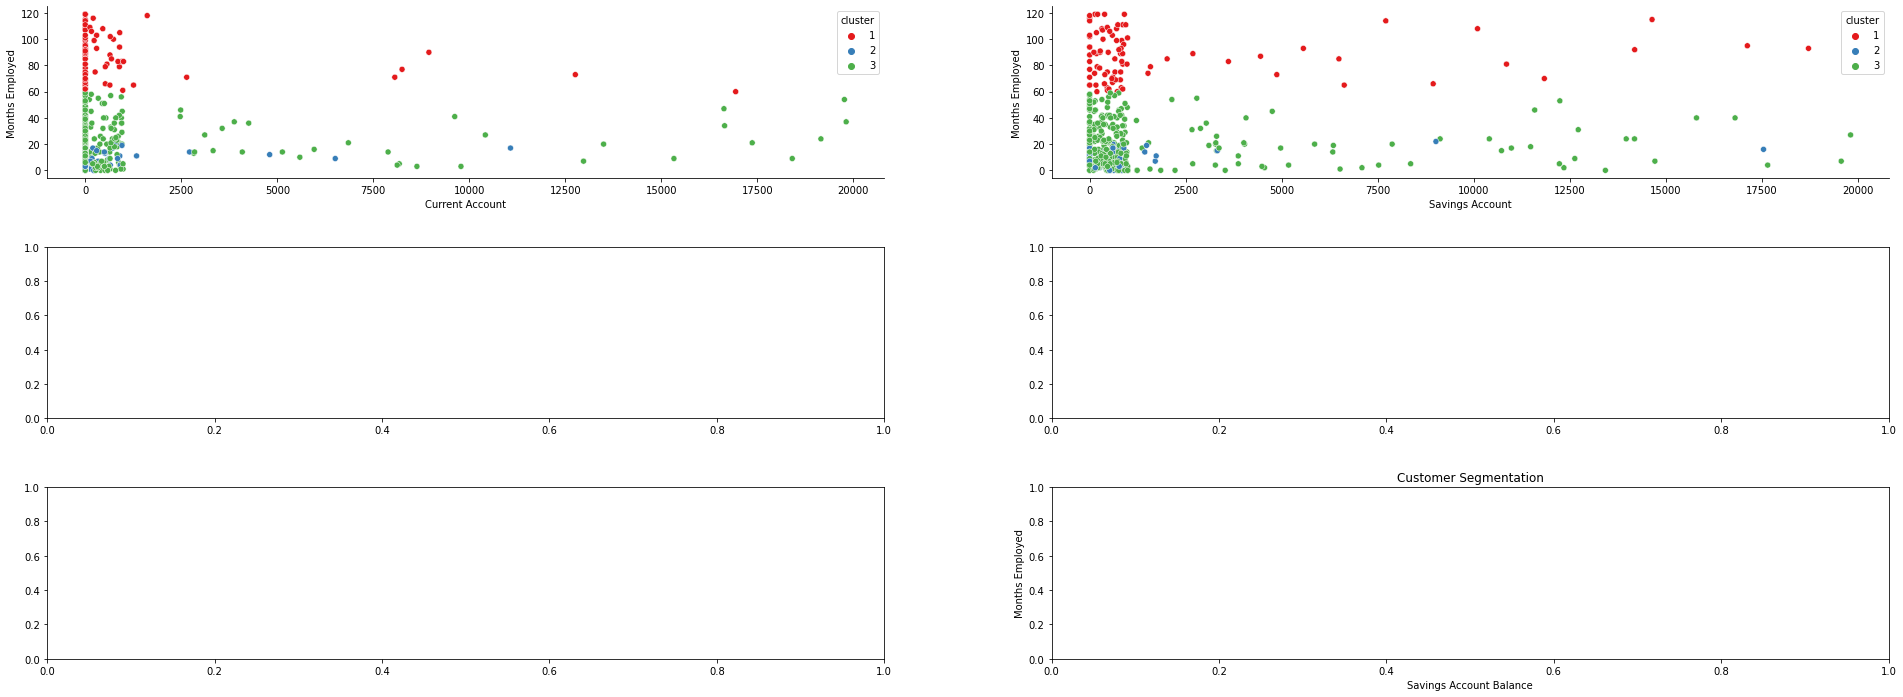

In [135]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a scatter plot for current account balances by Months Employed
sns.scatterplot(data=df, x='Current Account', y='Months Employed', hue='cluster', ax = axes[0,0], palette='Set1')
plt.xlabel('Current Account Balance')
plt.ylabel('Months Employed')
plt.title('Customer Segmentation')


axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a scatter plot for savings account balances by Months Employed
sns.scatterplot(data=df, x='Savings Account', y='Months Employed', hue='cluster', ax = axes[0,1], palette='Set1')
plt.xlabel('Savings Account Balance')
plt.ylabel('Months Employed')
plt.title('Customer Segmentation')


axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)
# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()


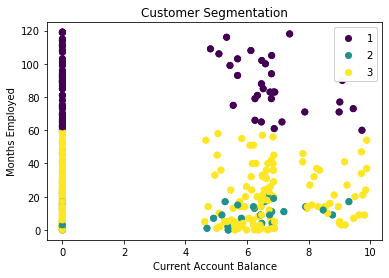

In [118]:
# Plot the clusters
plt.scatter(df['log_current_account'], df['Months Employed'], c=df['cluster'], cmap='viridis')
plt.xlabel('Current Account Balance')
plt.ylabel('Months Employed')
plt.title('Customer Segmentation')

legend = plt.legend(*plt.scatter(df['log_current_account'], df['Months Employed'], c=df['cluster'], cmap='viridis').legend_elements())
plt.gca().add_artist(legend)

plt.show()